In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Create a model for detecting Diabetes.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Feature Engineering

### Checking for null values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### As per the paper readings with value 0 indicate missing values

In [8]:
df[df["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
df[df["BloodPressure"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [10]:
df[(df["Insulin"]==0) & (df["Outcome"]==0)]  #As insulin with value 0 guarantees diabetes the others will be missing values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
758,1,106,76,0,0,37.5,0.197,26,0
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0


In [11]:
df[df["BMI"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [12]:
df[df["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


### Checking whether the target class is balanced or not

In [13]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

[Text(0, 0, 'Non-Diabetic'), Text(0, 0, 'Diabetic')]

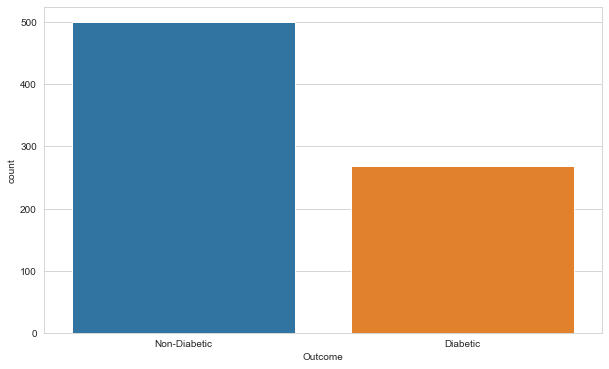

In [14]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Outcome",data=df)
plot.set_xticklabels(["Non-Diabetic","Diabetic"])

#### Seems to be fine

## Performing EDA using Panda Profiling

In [30]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Diabetes Prediction')
prof_report.to_widgets()

## Feature Engineering

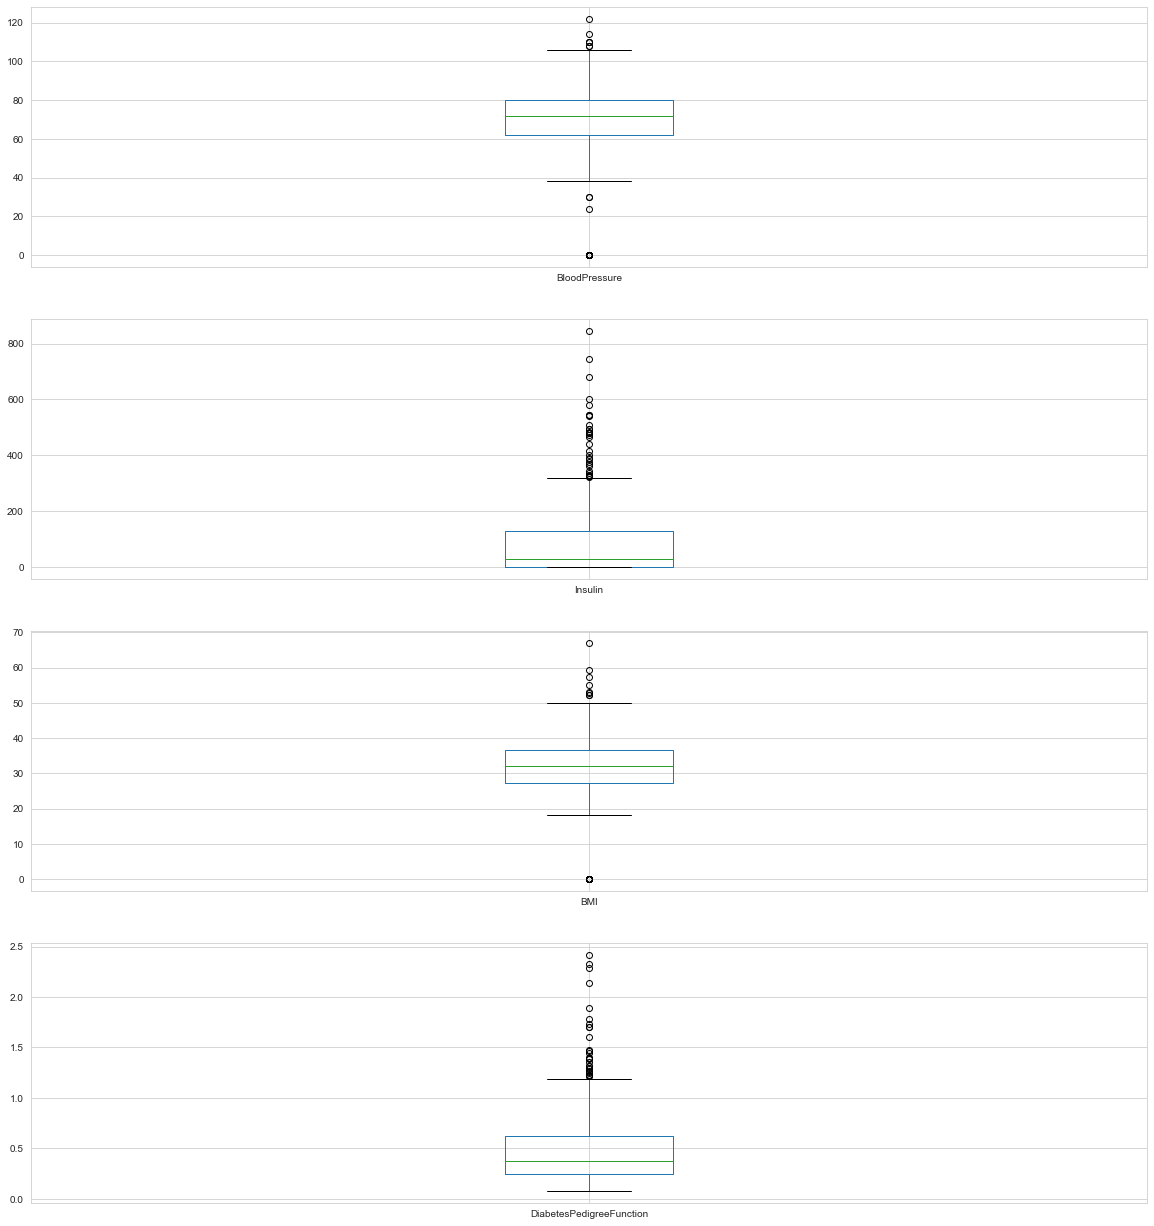

In [15]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='BloodPressure')
df.boxplot(ax=axes[1],column='Insulin')
df.boxplot(ax=axes[2],column='BMI')
df.boxplot(ax=axes[3],column='DiabetesPedigreeFunction')

In [16]:
IQR=df.BloodPressure.quantile(0.75)-df.BloodPressure.quantile(0.25)
upper_bridge=df['BloodPressure'].quantile(0.75)+(IQR*1.5)
# print(upper_bridge)
indices=df[df['BloodPressure']>upper_bridge].index
for i in indices.tolist():
    df['BloodPressure'][i]=upper_bridge

In [17]:
IQR=df.Insulin.quantile(0.75)-df.Insulin.quantile(0.25)
upper_bridge=df['Insulin'].quantile(0.75)+(IQR*1.5)
#print(upper_bridge)
indices=df[df['Insulin']>280].index
for i in indices.tolist():
    df['Insulin'][i]=280

#### Since there are many missing values(0) , the upper bridge is getting overestimated because of many 0's

In [18]:
IQR=df.BMI.quantile(0.75)-df.BMI.quantile(0.25)
upper_bridge=df['BMI'].quantile(0.75)+(IQR*1.5)
# print(upper_bridge)
indices=df[df['BMI']>upper_bridge].index
for i in indices.tolist():
    df['BMI'][i]=upper_bridge

In [19]:
IQR=df.DiabetesPedigreeFunction.quantile(0.75)-df.DiabetesPedigreeFunction.quantile(0.25)
upper_bridge=df['DiabetesPedigreeFunction'].quantile(0.75)+(IQR*1.5)
# print(upper_bridge)
indices=df[df['DiabetesPedigreeFunction']>upper_bridge].index
for i in indices.tolist():
    df['DiabetesPedigreeFunction'][i]=upper_bridge

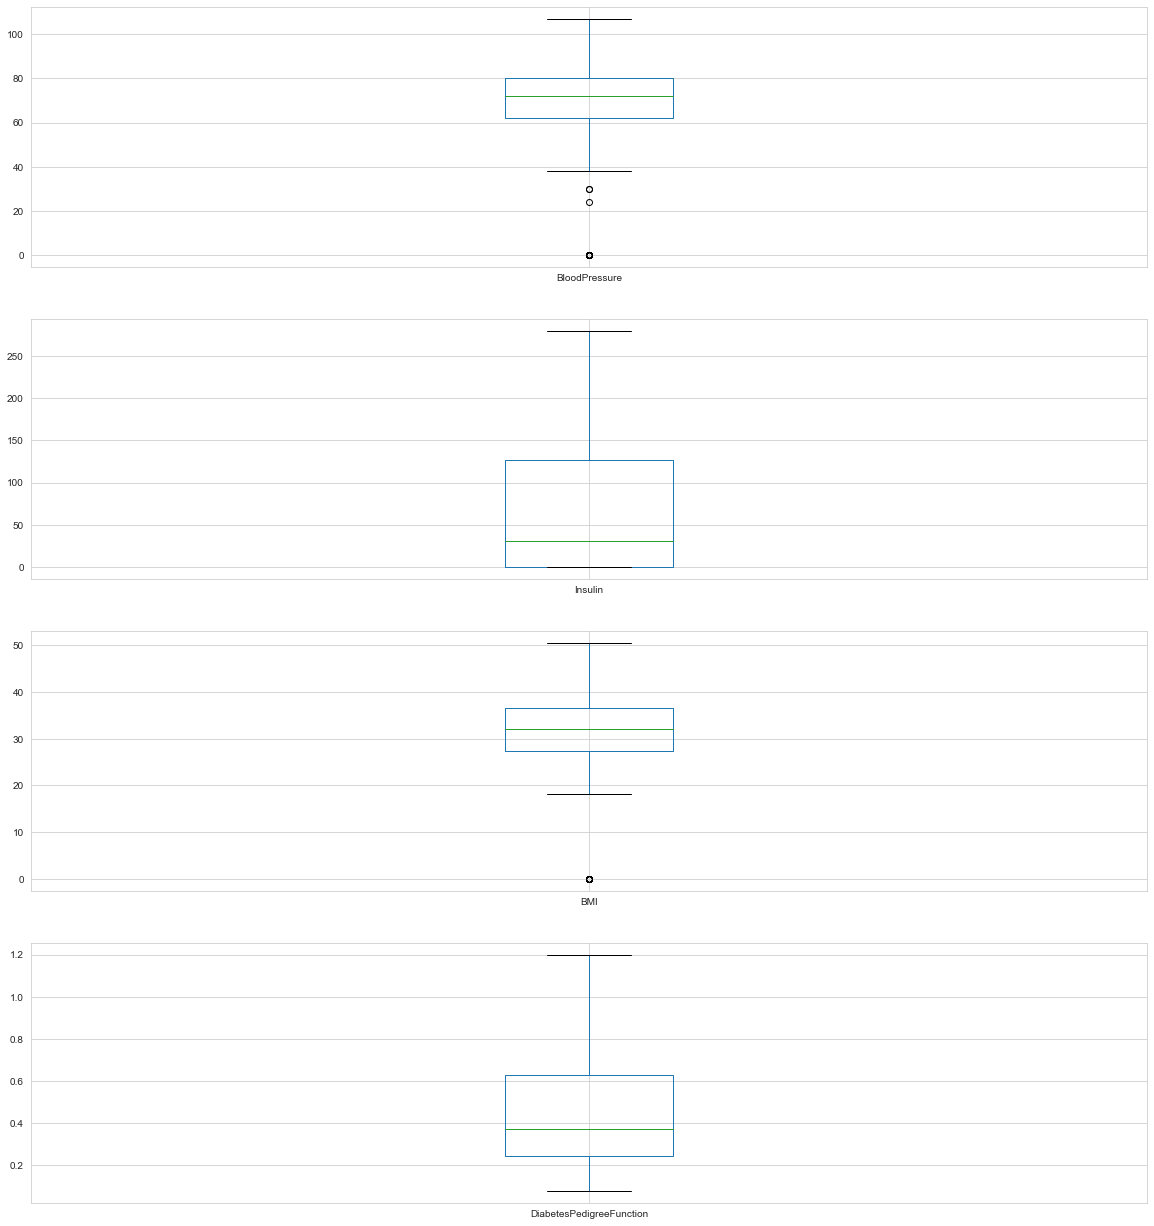

In [20]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='BloodPressure')
df.boxplot(ax=axes[1],column='Insulin')
df.boxplot(ax=axes[2],column='BMI')
df.boxplot(ax=axes[3],column='DiabetesPedigreeFunction')

## Feature Selection

#### Using Heatmap

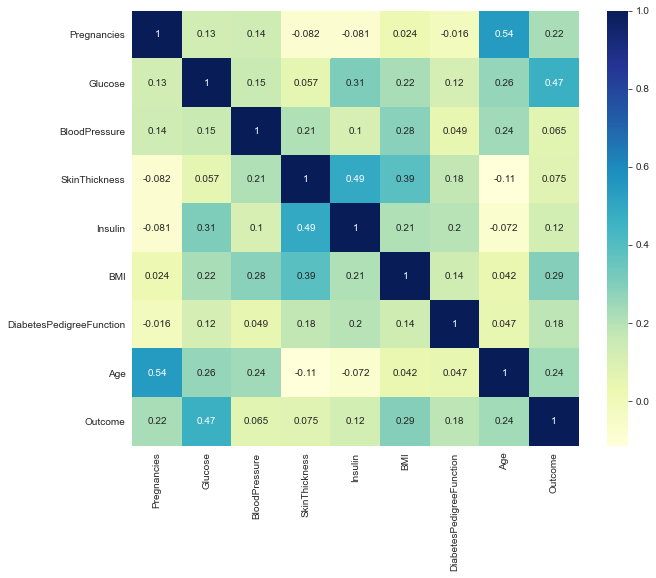

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [296]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [297]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [298]:
y=df["Outcome"]

In [299]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [300]:
print(model.feature_importances_)

[0.11108526 0.23165457 0.10194461 0.0801869  0.07682555 0.14342311
 0.11884056 0.13603944]


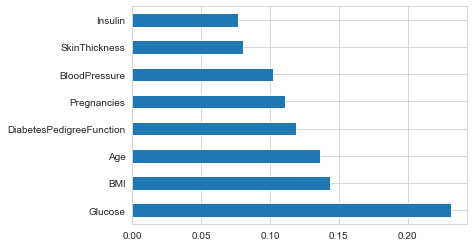

In [301]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [22]:
y=df["Outcome"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [25]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [26]:
glucose_mean=x_train['Glucose'].mean()
x_train['Glucose']=x_train['Glucose'].replace({0:glucose_mean})
x_test['Glucose']=x_test['Glucose'].replace({0:glucose_mean})

In [27]:
bp_mean=x_train["BloodPressure"].mean()
x_train["BloodPressure"]=x_train["BloodPressure"].replace({0:bp_mean})
x_test["BloodPressure"]=x_test["BloodPressure"].replace({0:bp_mean})

In [28]:
insulin_median=x_train['Insulin'].median()
x_train['Insulin']=x_train['Insulin'].replace({0:insulin_median})
x_test['Insulin']=x_test['Insulin'].replace({0:insulin_median})

In [29]:
BMI_mean=x_train['BMI'].mean()
x_train['BMI']=x_train['BMI'].replace({0:BMI_mean})
x_test['BMI']=x_test['BMI'].replace({0:BMI_mean})

## Final Model

In [340]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping

In [390]:
model =Sequential()


model.add(Dense(60,activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(40,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.5))





#Binary classification
model.add(Dense(1,activation="sigmoid"))
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="SGD")

In [391]:
import tensorflow
from IPython.display import clear_output
class PlotLearning(tensorflow.keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [392]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [393]:
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

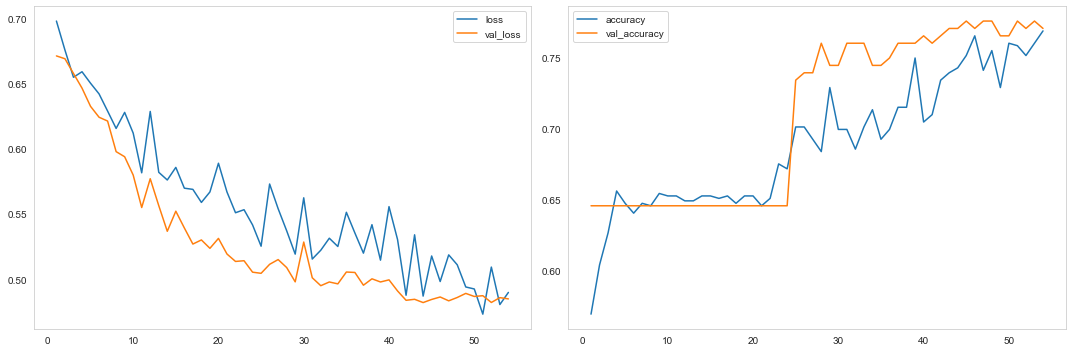

Epoch 00054: early stopping


In [394]:
model.fit(x=x_train,y=y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[early_stop,PlotLearning()],batch_size=3)

In [397]:
predictions=model.predict_classes(x_test)

In [398]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       124
           1       0.64      0.82      0.72        68

    accuracy                           0.77       192
   macro avg       0.76      0.78      0.76       192
weighted avg       0.80      0.77      0.78       192



In [359]:
model.save("bsize3-acc76rec0-85-1-71.h5")